In [214]:
import requests as rq
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML

In [2]:
cases_endpt = 'https://api.gdc.cancer.gov/cases'

# query file

See https://docs.gdc.cancer.gov/API/Users_Guide/Appendix_A_Available_Fields/#file-fields for possible *fields*

In [133]:
fields = [
    "submitter_id",
    "case_id",
    "primary_site",
    "disease_type",
    "diagnoses.tumor_stage",
    "diagnoses.tumor_grade",
    "diagnoses.primary_diagnosis",
    "diagnoses.classification_of_tumor",
    "annotations.classification",
    "samples.tumor_code"
    ]

fields = ','.join(fields)

In [193]:
def queryFile(idFile):
    filters = {
    "op": "in",
    "content":{
        "field": "files.file_name",
        "value": [idFile]
        }
    }
    params = {
    "fields": fields,
    "filters": json.dumps(filters),
    "format": "TSV",
    "size": "1"
    }
    print("quering...%s"%idFile)
    response = rq.get(cases_endpt, params = params)
    #print(response.content.decode('utf-8'))
    r = response.content.decode("utf-8").split('\r')
    data = np.array(r[1].replace('\n','').split('\t'))
    data = data.reshape(1,len(data))
    return pd.DataFrame(data=data, columns=r[0].split('\t'), index=[0])

In [194]:
queryFile('418eab89-5e78-4be3-ba93-c9dc2a7d1c68.FPKM.txt.gz')

quering...418eab89-5e78-4be3-ba93-c9dc2a7d1c68.FPKM.txt.gz


,samples.0.tumor_code,disease_type,diagnoses.0.vital_status,samples.1.tumor_code,submitter_id,diagnoses.0.classification_of_tumor,case_id,primary_site,diagnoses.0.tumor_grade,diagnoses.0.primary_diagnosis,diagnoses.0.tumor_stage,id
0,,Adenomas and Adenocarcinomas,alive,,TCGA-EY-A548,not reported,56bdb68c-a647-4aba-94ac-9cd52bb5344a,Corpus uteri,not reported,"Endometrioid adenocarcinoma, NOS",not reported,56bdb68c-a647-4aba-94ac-9cd52bb5344a


## query many

In [196]:
files = []

In [243]:
cluster = {0: [('85593c7d-7441-4d41-81d3-aaa17c7e398b.F', 1.0),
  ('586ea1a7-d99f-46ef-aba9-1ae0d8a28e3e.F', 1.0),
  ('293bd050-b485-496e-9b2c-02564e790879.F', 1.0),
  ('f311b81e-f58e-4dac-be2d-5a39c19399ac.F', 1.0)],
 1: [('4d5b0ba8-64d8-404b-9a83-fc4111686afe.F', 1.0),
  ('29c4a2e1-2e48-4f4a-9ad6-9b0a7c04b8e9.F', 1.0),
  ('bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F', 1.0),
  ('ae2a857b-c219-4361-8d55-23047f8355fe.F', 1.0),
  ('656900ef-bf75-4cc8-a73f-80b4a88a97fd.F', 1.0)],
 2: [('e0359251-5611-4343-82d8-05212fb61806.F', 1.0),
  ('426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F', 1.0),
  ('df2df36d-6652-4eec-b62a-ea99af075cb6.F', 1.0),
  ('867623c6-6379-44cc-93a2-f0332e62f3c4.F', 1.0),
  ('a87961f7-7a05-4248-a683-7047af4ea194.F', 1.0),
  ('7dd9bc72-4979-4d27-af6f-638b226d37d5.F', 1.0)],
 3: [('bd587a68-76f5-44f2-ac6b-f87523560f60.F', 1.0),
  ('b41174a5-4db8-438c-a9fa-6da8c08a9c75.F', 1.0),
  ('8b38a4c1-3e32-48fd-b8ff-1096aee875ae.F', 1.0),
  ('38083e21-7761-47c7-9112-769c7f85e283.F', 1.0),
  ('418eab89-5e78-4be3-ba93-c9dc2a7d1c68.F', 1.0),
  ('3a657ffc-d6c1-44a6-8d6f-a955e5d1fe35.F', 1.0),
  ('ef346f06-5795-481c-aa55-d4dc5c7c90ad.F', 1.0),
  ('891d5512-0e8d-4dac-9f76-71aeae3937a6.F', 1.0)],
 4: [('e74a575b-5045-4727-b6c7-304e7afc77da.F', 1.0),
  ('54d00fcb-6468-4716-9491-d1094a250d46.F', 1.0),
  ('1006434c-1c1b-47a3-bbf0-8d331d8e1722.F', 1.0),
  ('6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F', 1.0),
  ('4e4bf99a-730b-4de9-b235-9e65e4509e8b.F', 1.0)],
 5: [('4e7e76ad-0f1d-4322-a749-a483a810dba5.F', 1.0),
  ('1b4450ca-dbae-44a7-ba36-abceed1b108e.F', 1.0),
  ('21800024-cf76-4185-b57b-526539ccdba2.F', 1.0),
  ('00e2c524-8a29-46d7-bf88-ed5f9c3dcf32.F', 1.0),
  ('65312630-1884-4160-b812-d932fc0a7c78.F', 1.0)],
 6: [('4dbc0492-036f-470c-800d-03b82a81d10d.F', 1.0),
  ('15ba704d-dbce-4532-8d07-f6f93ed4c12a.F', 1.0),
  ('0c2cf133-50aa-44c9-b4a8-5d17ac2f54f4.F', 1.0),
  ('8e884e57-d4c4-4b44-a7a3-76bc9694388f.F', 1.0),
  ('ea50d2da-4f84-46dc-8036-c34392793aed.F', 1.0),
  ('b12b56a4-cea1-4e14-a925-97c46b08cddb.F', 1.0),
  ('1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F', 1.0),
  ('c183624c-10c6-40c7-9aba-46e2efb19930.F', 1.0),
  ('86b6f374-3d4c-4da2-a89b-489a944bdeab.F', 1.0)],
 7: [('e7b40048-f3f9-4887-83ca-ccba24ae9f83.F', 1.0),
  ('ef8842e5-d2b7-438c-9fc0-f48b736cd2b1.F', 1.0),
  ('bdb254d4-48fe-42d1-b907-0c81cf4c50c0.F', 1.0),
  ('042b37c5-7ba2-4731-8b16-5510cce257b4.F', 1.0),
  ('0b82329b-b34a-4cf5-ae33-f774c6401745.F', 1.0),
  ('7b2c7499-15c0-4926-a12c-4561df34954b.F', 1.0),
  ('4b68dd95-805d-42cc-a1e8-9bb64e29f9f5.F', 1.0),
  ('9ea6fa36-f1a0-4610-a300-c11aa7ab39cf.F', 1.0),
  ('3e528390-3ccc-4821-9dd5-52e344a37258.F', 1.0)],
 8: [('89c025ed-103f-4372-882c-d996ff60a1cc.F', 1.0),
  ('171a4828-984e-4225-b16c-c0bd6c319e06.F', 1.0),
  ('55f30812-1dc9-4ca8-b3f7-7762de3f961d.F', 1.0),
  ('14a7070c-a557-4091-a6d7-f5900636aa57.F', 1.0),
  ('f8001c8a-39b5-4ff9-b607-cf91ad696494.F', 1.0),
  ('82d61f67-f56e-4855-aa2e-44350982f8af.F', 1.0),
  ('ffd7b10e-8c0c-4aeb-81a0-b060108d57fa.F', 1.0),
  ('fabbefc8-53b5-42e4-9a54-39280d18f419.F', 1.0),
  ('459da4d7-7821-4275-a733-576e4504ce5f.F', 1.0),
  ('f1dcd148-bd99-4eba-a5a2-0e51e8b22414.F', 1.0)],
 9: [('b25c8e4d-f6ca-4079-9120-b96147b9091e.F', 1.0),
  ('d903e92f-677f-4292-b2f7-66e0fcea767f.F', 1.0),
  ('0a15de63-cefc-429b-a1b3-b9140a251325.F', 1.0),
  ('95234108-3579-4c2c-af95-7c6780270af4.F', 1.0),
  ('32d19362-1f02-4584-b30a-758c1ba99c8a.F', 1.0),
  ('10a32136-8a4d-4af3-8e70-543b2a336c91.F', 1.0)],
 10: [('3a34e792-461f-45f5-9c4e-a29deeef9ce2.F', 1.0),
  ('6947d9d0-2d4f-444e-889f-7dafccb67251.F', 1.0),
  ('799199d9-0ff7-4d58-97bd-08009f64947d.F', 1.0),
  ('1f781542-09e0-48ff-8363-3a6cef4ebc83.F', 1.0)],
 11: [('67418961-d894-42a9-ae6a-21f41e6ca9bf.F', 1.0),
  ('6c8fc35f-d650-41fc-93ed-6e41dfa26680.F', 1.0),
  ('ce0d85eb-9854-4570-b497-09039a135d7e.F', 1.0),
  ('6a2fc43b-131d-4bba-8e64-8a39243fcdc6.F', 1.0),
  ('0a4df4cc-74dd-4858-864b-b483e75b30f8.F', 1.0),
  ('26657b95-de92-4d40-a793-a9ef7ccaa352.F', 1.0),
  ('79f4b12a-ed1c-46d5-ae3d-a0422454eaf4.F', 1.0),
  ('8cd31f85-1d2e-4d90-bd8b-7ca7ebd9241b.F', 1.0)],
 12: [('e5ea329f-8042-479c-b8ff-fb752b6b44e0.F', 1.0),
  ('f3631c65-b194-4894-85cb-146980e4cb2c.F', 1.0),
  ('bd29f662-4f53-43ce-ad0f-ebcb62546109.F', 1.0)],
 13: [('875c4c80-bbe2-4ab7-b276-adc8ecaa987c.F', 1.0),
  ('b810e759-2e8f-4b30-9d76-d0c11e93ca1e.F', 1.0),
  ('29dab10a-a0a0-4dbd-b574-97c22b70a3f1.F', 1.0),
  ('62d1ce0e-55a8-4c31-9e96-e0c0cb95235f.F', 1.0),
  ('22b2edfc-baf9-4a23-b87a-ae4c1b249664.F', 1.0),
  ('dc1fb8de-58f0-444e-be36-1a2256c01c86.F', 1.0)],
 14: [('f8d89988-7ca5-4d3b-91da-ffaca0702f9c.F', 1.0)],
 15: [('36efaf00-cc8e-437b-893d-6dcec1328022.F', 1.0),
  ('9ae4ee25-88d4-4078-b6cc-f744c50dde8a.F', 1.0),
  ('b15a2a09-2fa9-4696-a65a-9341f490fdb5.F', 1.0),
  ('9d7fd5bb-7767-467e-a664-ce602517ee78.F', 1.0),
  ('39952ce1-cb34-48c6-ad20-7aca8286f4ef.F', 1.0)],
 16: [('25b57a17-29ab-41f6-8809-45cf5b58a329.F', 1.0),
  ('48297930-d22a-463d-80ac-52214964f067.F', 1.0),
  ('54b3225b-c8ae-4fef-a346-735e6ee576f9.F', 1.0)],
 17: [('e934722f-3571-4348-a518-1ad262b86b94.F', 1.0),
  ('8d13e259-238e-4d2f-b9d3-4cffd4302abb.F', 1.0)],
 18: [('43716956-aa57-46fb-afd7-0d244f21af00.F', 1.0)]}

In [256]:
def queryFiles(files):
    df = pd.DataFrame(columns=fields.split(','))
    for i,f  in enumerate(files):
        df = df.append(queryFile(f), ignore_index=True)
    print(df.head())
    return df

In [261]:
def makePie(df, l, c, col = 'disease_type'):
    col_counts = df.loc[:,col].value_counts()
    fig = plt.figure(figsize=(15,8))
    col_counts.plot(kind='pie', fontsize=16, title = col)
    fig.savefig("cluster_pie_%s_l_%d_c%d.pdf"%(col,l, c))

quering...85593c7d-7441-4d41-81d3-aaa17c7e398b.FPKM.txt.gz
quering...586ea1a7-d99f-46ef-aba9-1ae0d8a28e3e.FPKM.txt.gz
quering...293bd050-b485-496e-9b2c-02564e790879.FPKM.txt.gz
quering...f311b81e-f58e-4dac-be2d-5a39c19399ac.FPKM.txt.gz
  annotations.classification                               case_id  \
0                        NaN  93a337ae-2bd3-4464-b38f-93dff92d3fde   
1                        NaN  1fe594d9-4240-49ee-8afd-c7d16a377181   
2                        NaN  969399cd-47b6-4c0f-8939-3860be3014f9   
3                        NaN  d7207811-3f9a-48ac-ab9b-3e8af1b1d9f2   

  diagnoses.0.classification_of_tumor     diagnoses.0.primary_diagnosis  \
0                        not reported               Adenocarcinoma, NOS   
1                        not reported               Adenocarcinoma, NOS   
2                        not reported  Infiltrating duct carcinoma, NOS   
3                        not reported           Malignant melanoma, NOS   

  diagnoses.0.tumor_grade diagnoses.0

quering...bd587a68-76f5-44f2-ac6b-f87523560f60.FPKM.txt.gz
quering...b41174a5-4db8-438c-a9fa-6da8c08a9c75.FPKM.txt.gz
quering...8b38a4c1-3e32-48fd-b8ff-1096aee875ae.FPKM.txt.gz
quering...38083e21-7761-47c7-9112-769c7f85e283.FPKM.txt.gz
quering...418eab89-5e78-4be3-ba93-c9dc2a7d1c68.FPKM.txt.gz
quering...3a657ffc-d6c1-44a6-8d6f-a955e5d1fe35.FPKM.txt.gz
quering...ef346f06-5795-481c-aa55-d4dc5c7c90ad.FPKM.txt.gz
quering...891d5512-0e8d-4dac-9f76-71aeae3937a6.FPKM.txt.gz
  annotations.classification                               case_id  \
0                        NaN  cf9d5813-da70-4d7f-8185-d29d1b86b578   
1                        NaN  271e8024-a008-4bf0-9f6e-177f60096b1b   
2                        NaN  f97fed28-fdf3-4c82-8b6d-1015848b80dc   
3                        NaN  6a0bcf0c-fa4c-4119-99d2-f722b781d20f   
4                        NaN  56bdb68c-a647-4aba-94ac-9cd52bb5344a   

  diagnoses.0.classification_of_tumor  \
0                        not reported   
1                        

quering...15ba704d-dbce-4532-8d07-f6f93ed4c12a.FPKM.txt.gz
quering...0c2cf133-50aa-44c9-b4a8-5d17ac2f54f4.FPKM.txt.gz
quering...8e884e57-d4c4-4b44-a7a3-76bc9694388f.FPKM.txt.gz
quering...ea50d2da-4f84-46dc-8036-c34392793aed.FPKM.txt.gz
quering...b12b56a4-cea1-4e14-a925-97c46b08cddb.FPKM.txt.gz
quering...1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.FPKM.txt.gz
quering...c183624c-10c6-40c7-9aba-46e2efb19930.FPKM.txt.gz
quering...86b6f374-3d4c-4da2-a89b-489a944bdeab.FPKM.txt.gz
  annotations.classification                               case_id  \
0                        NaN  08c1bb22-81f5-4a6d-98ce-f9c31d896eab   
1                        NaN  aa909ffb-03e1-4e3f-8888-2212b23d90b7   
2                        NaN  8624354c-af25-423c-9c71-48a5dd821097   
3                        NaN  db3e1ce8-4a05-4bfc-b5ae-13cf789369e1   
4                        NaN  c2f7f72f-13ae-4efc-9cda-69ca037b4498   

  diagnoses.0.classification_of_tumor     diagnoses.0.primary_diagnosis  \
0                        not rep

quering...f8001c8a-39b5-4ff9-b607-cf91ad696494.FPKM.txt.gz
quering...82d61f67-f56e-4855-aa2e-44350982f8af.FPKM.txt.gz
quering...ffd7b10e-8c0c-4aeb-81a0-b060108d57fa.FPKM.txt.gz
quering...fabbefc8-53b5-42e4-9a54-39280d18f419.FPKM.txt.gz
quering...459da4d7-7821-4275-a733-576e4504ce5f.FPKM.txt.gz
quering...f1dcd148-bd99-4eba-a5a2-0e51e8b22414.FPKM.txt.gz
  annotations.classification                               case_id  \
0                        NaN  5f539ac1-c4c8-46cc-98d7-8951a6ed680a   
1                        NaN  f0de67ff-8967-4fce-9c12-0e07193285cd   
2                        NaN  287fc873-3f50-4b7d-89eb-ebbf858ddfcf   
3                        NaN  986ced10-52b9-43b4-84ad-96013a657f1b   
4                        NaN  af363cec-bec9-4de3-8cc2-e98b0eed2858   

  diagnoses.0.classification_of_tumor   diagnoses.0.primary_diagnosis  \
0                        not reported           Thymic carcinoma, NOS   
1                        not reported          Lobular carcinoma, NOS   
2     

quering...6c8fc35f-d650-41fc-93ed-6e41dfa26680.FPKM.txt.gz
quering...ce0d85eb-9854-4570-b497-09039a135d7e.FPKM.txt.gz
quering...6a2fc43b-131d-4bba-8e64-8a39243fcdc6.FPKM.txt.gz
quering...0a4df4cc-74dd-4858-864b-b483e75b30f8.FPKM.txt.gz
quering...26657b95-de92-4d40-a793-a9ef7ccaa352.FPKM.txt.gz
quering...79f4b12a-ed1c-46d5-ae3d-a0422454eaf4.FPKM.txt.gz
quering...8cd31f85-1d2e-4d90-bd8b-7ca7ebd9241b.FPKM.txt.gz
  annotations.classification                               case_id  \
0                        NaN  6f6e7356-3521-4674-8eec-ad01340d4b8e   
1                        NaN  010a807f-9dc0-4e14-9533-dcf478f3d947   
2                        NaN  50f15b12-4dc4-403f-94b0-9d121306ee30   
3                        NaN  ec3870c9-4930-4af7-b2eb-1e16c9ec9f14   
4                        NaN  f59b9c65-46e8-4cc3-aa71-8844f6c2273c   

  diagnoses.0.classification_of_tumor diagnoses.0.primary_diagnosis  \
0                        not reported        Lobular carcinoma, NOS   
1                       

  annotations.classification                               case_id  \
0                        NaN  f3ba71f9-25f3-4784-bf2d-3aa522a0cba8   

  diagnoses.0.classification_of_tumor     diagnoses.0.primary_diagnosis  \
0                        not reported  Infiltrating duct carcinoma, NOS   

  diagnoses.0.tumor_grade diagnoses.0.tumor_stage diagnoses.0.vital_status  \
0            not reported               stage iib                    alive   

  diagnoses.classification_of_tumor diagnoses.primary_diagnosis  \
0                               NaN                         NaN   

  diagnoses.tumor_grade diagnoses.tumor_stage diagnoses.vital_status  \
0                   NaN                   NaN                    NaN   

                   disease_type                                    id  \
0  Ductal and Lobular Neoplasms  f3ba71f9-25f3-4784-bf2d-3aa522a0cba8   

  primary_site samples.0.tumor_code samples.1.tumor_code samples.tumor_code  \
0       Breast                               

  annotations.classification                               case_id  \
0                        NaN  a94de778-9c21-410d-8b9d-0f9240036bb8   

  diagnoses.classification_of_tumor diagnoses.primary_diagnosis  \
0                               NaN                         NaN   

  diagnoses.tumor_grade diagnoses.tumor_stage diagnoses.vital_status  \
0                   NaN                   NaN                    NaN   

   disease_type                                    id primary_site  \
0  Not Reported  a94de778-9c21-410d-8b9d-0f9240036bb8  Uterus, NOS   

  samples.0.tumor_code samples.tumor_code  submitter_id  
0                                     NaN  TCGA-FL-A1YU  


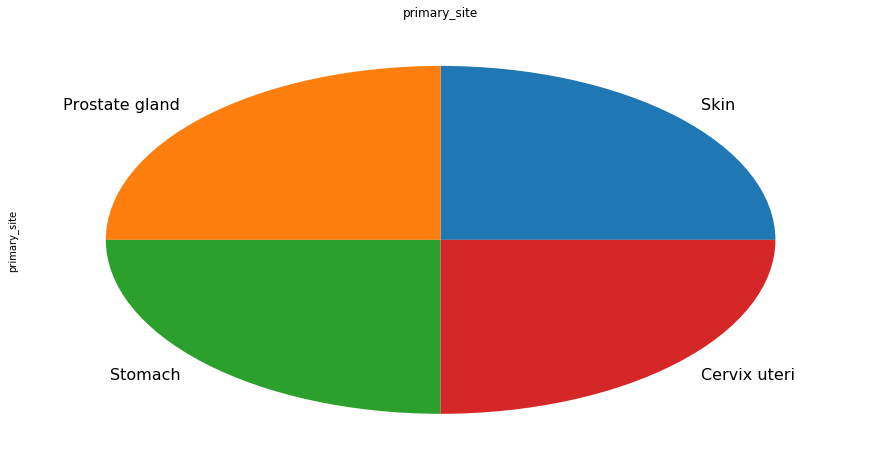

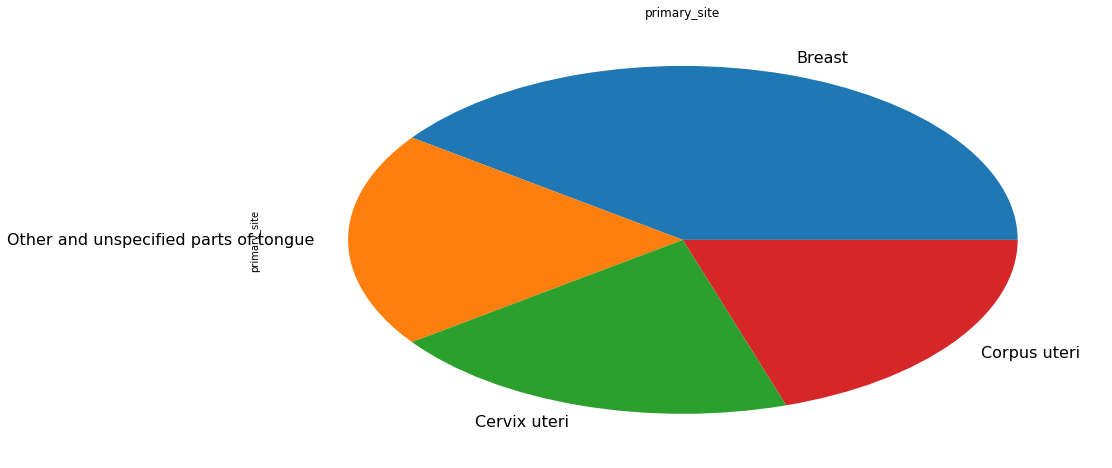

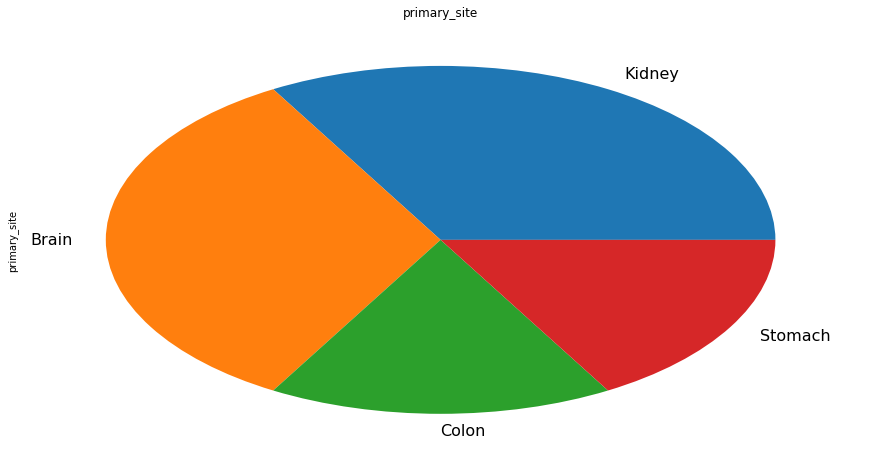

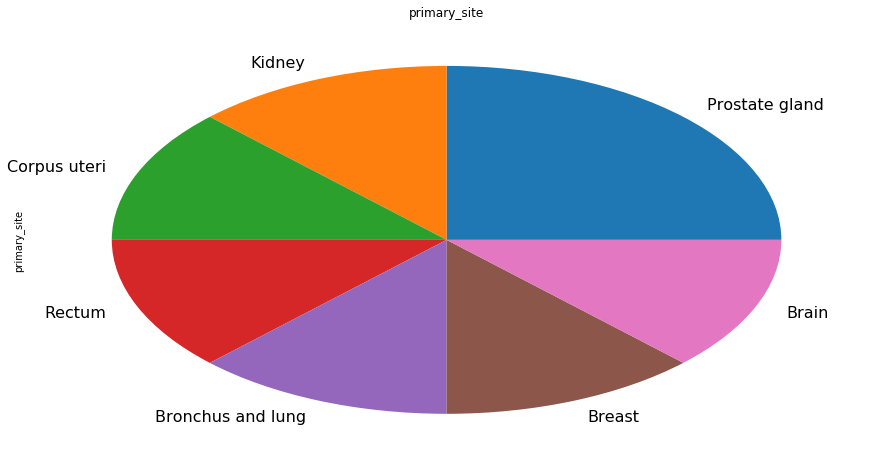

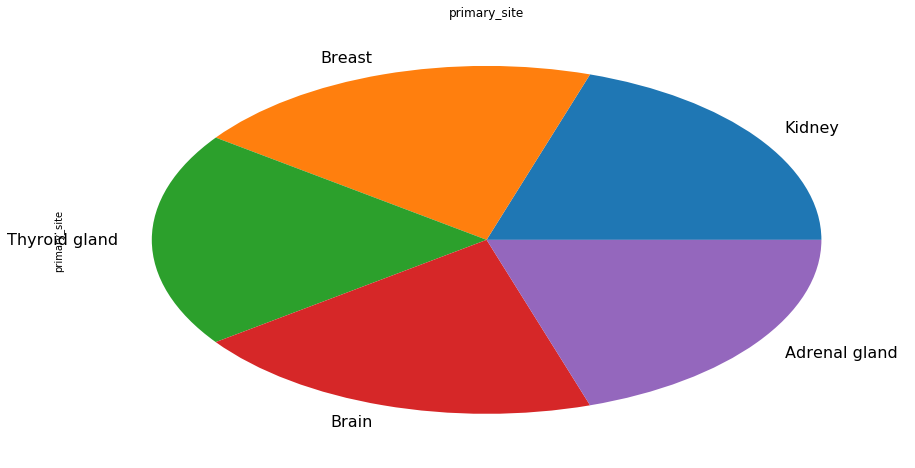

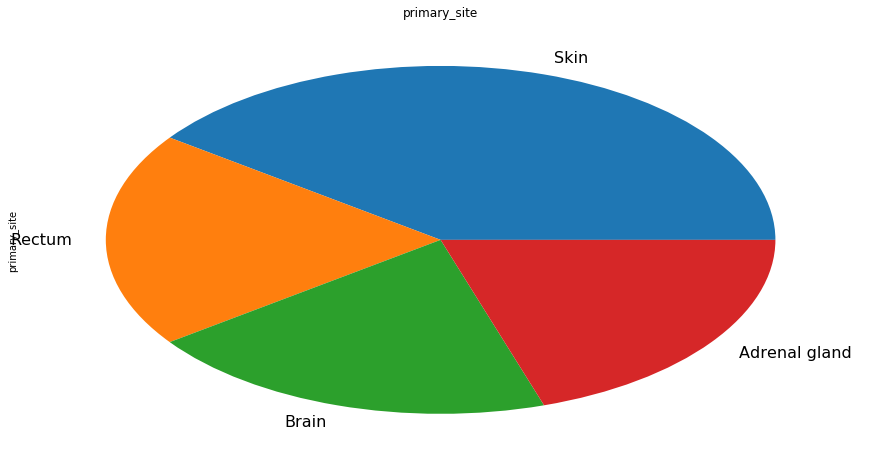

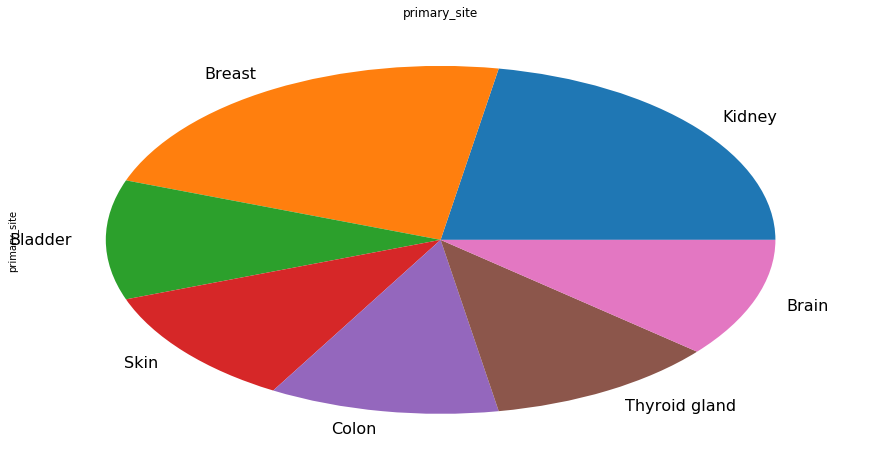

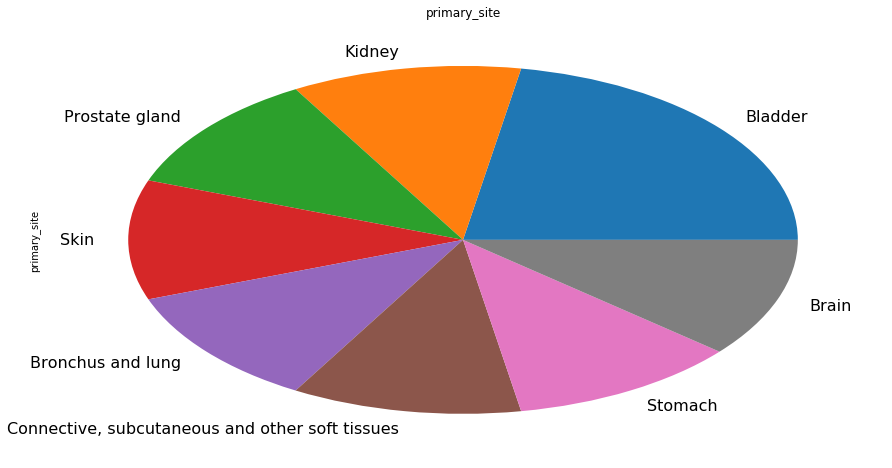

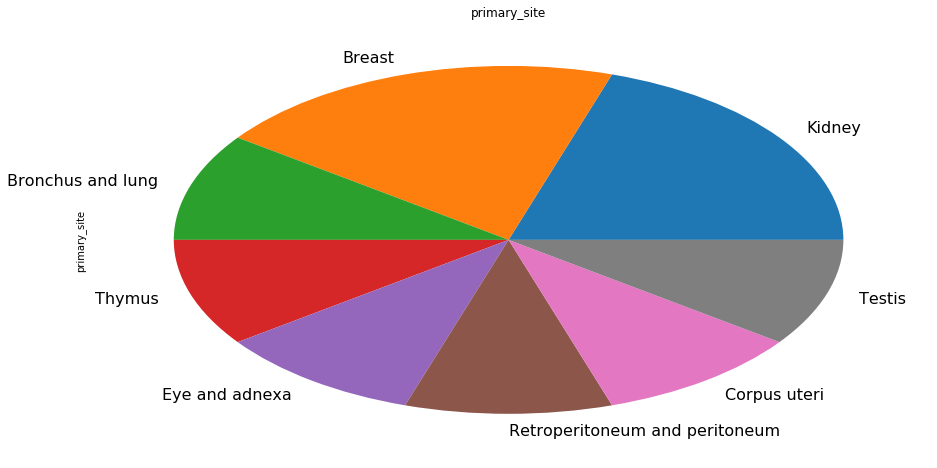

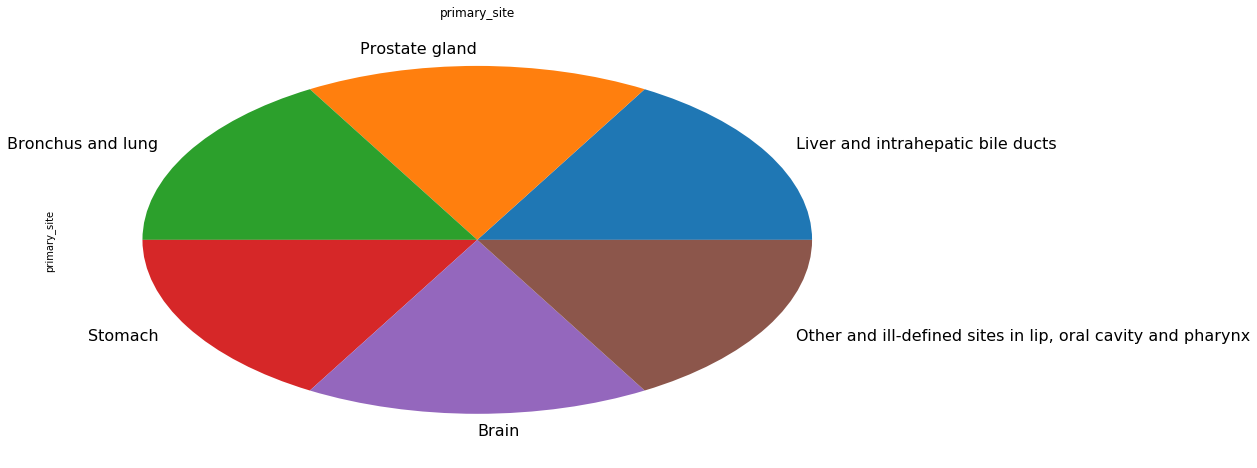

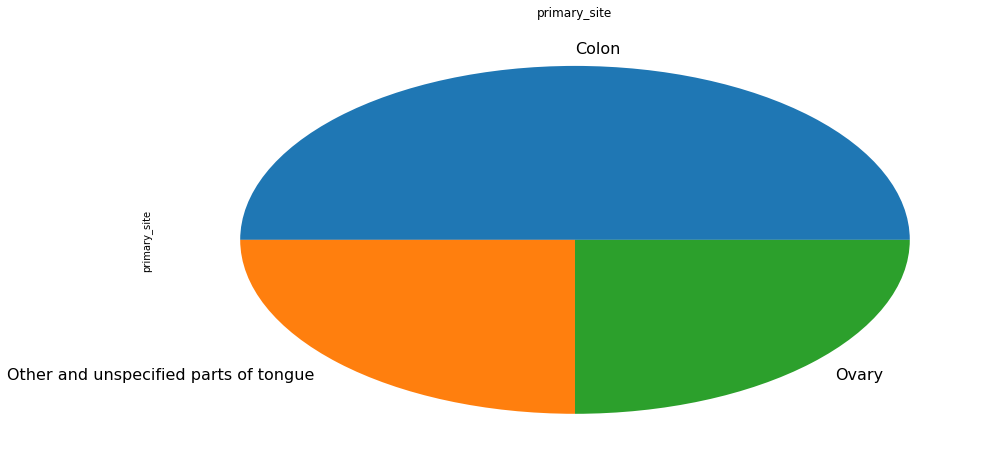

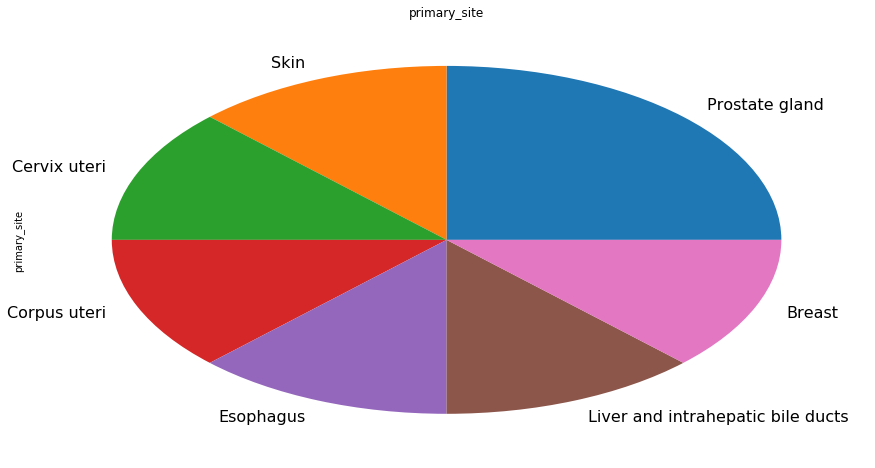

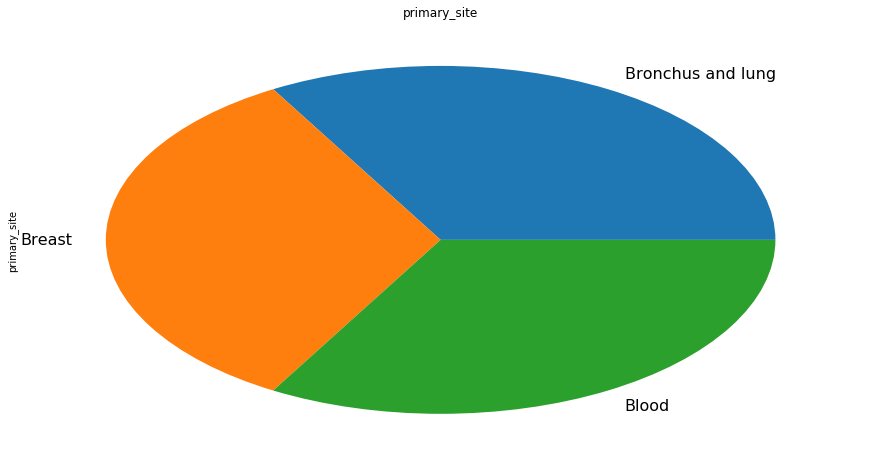

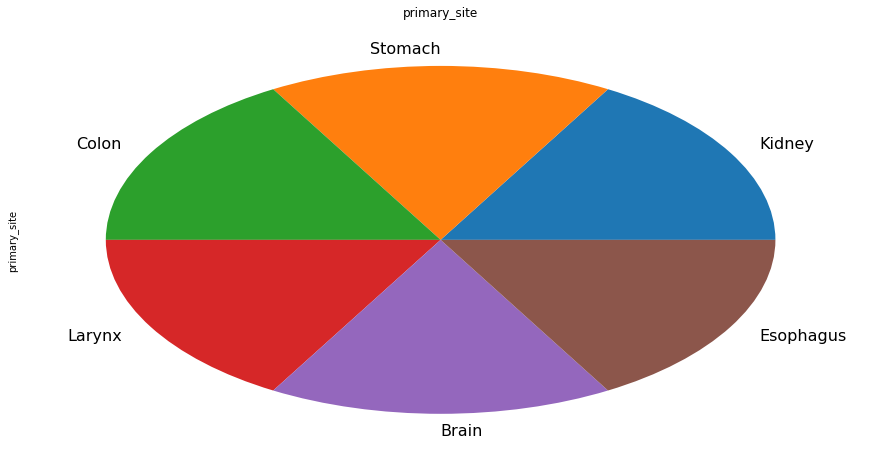

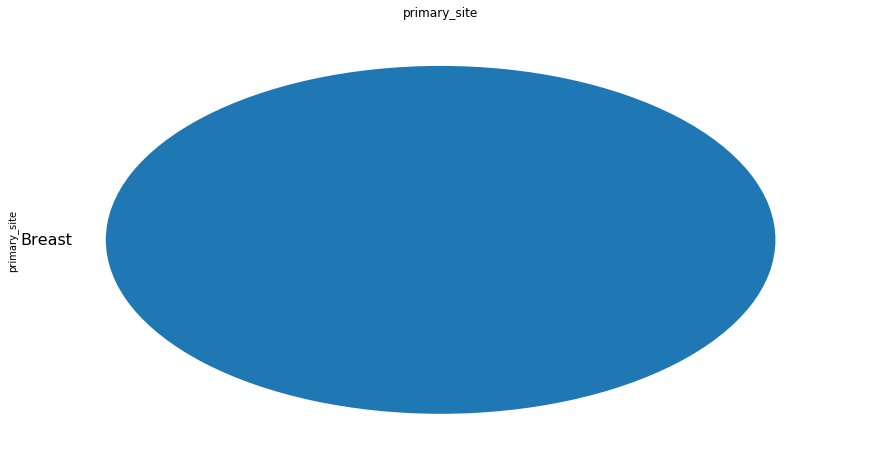

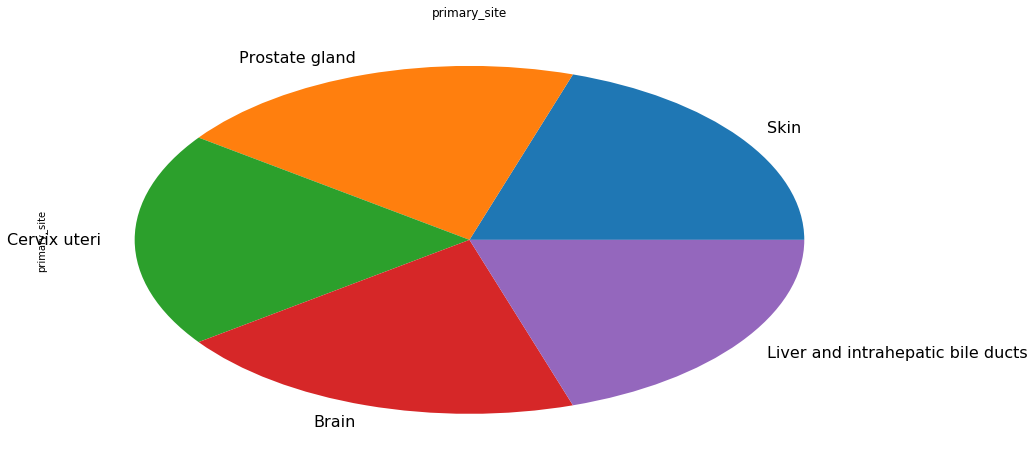

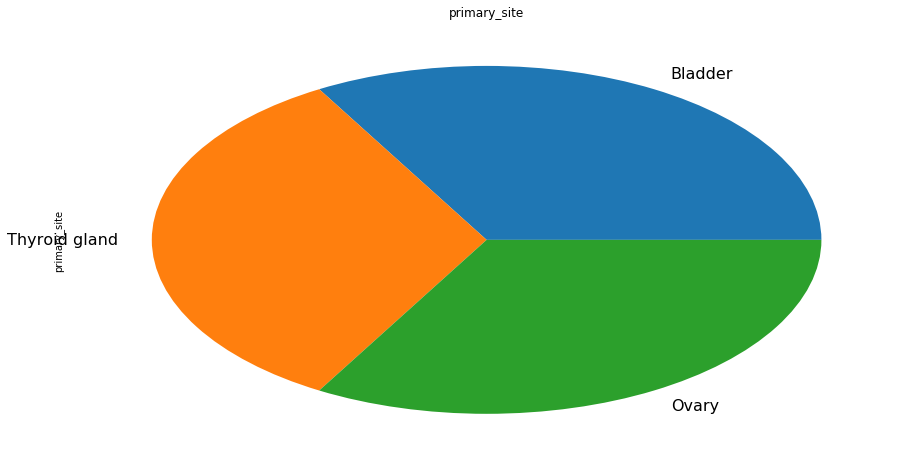

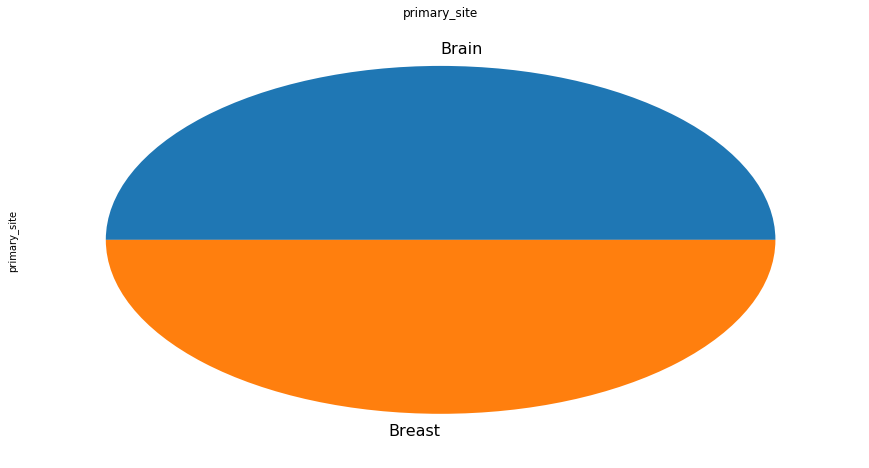

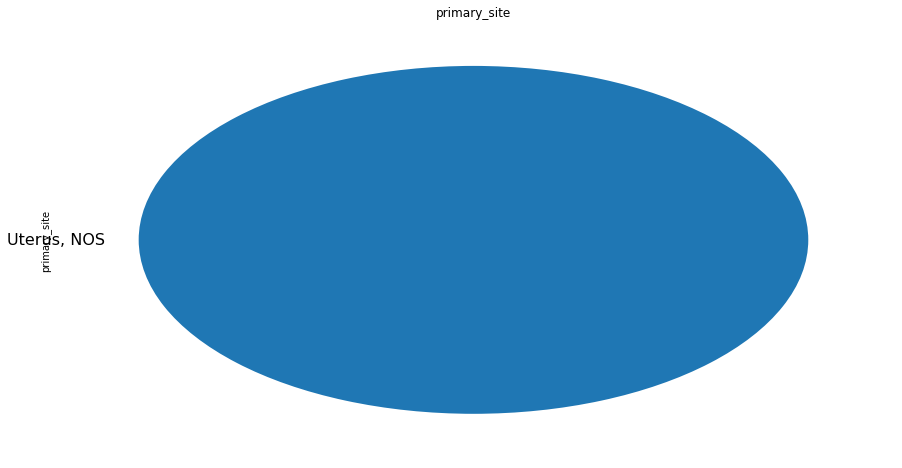

In [262]:
for c in cluster:
    makePie(queryFiles([f[0][:-2]+".FPKM.txt.gz" for f in cluster[c]]), 0, c, 'primary_site')

# Schemas

See https://docs.gdc.cancer.gov/API/Users_Guide/Submission/#gdc-data-dictionary-endpoints for details

In [175]:
endpoints = rq.get('https://api.gdc.cancer.gov/v0/submission/_dictionary/case')
endpoints_response = endpoints.json()

In [176]:
endpoints_response.keys()

[u'category',
 u'uniqueKeys',
 u'description',
 u'links',
 u'title',
 u'systemProperties',
 u'required',
 u'namespace',
 u'properties',
 u'project',
 u'previous_version_downloadable',
 u'program',
 u'downloadable',
 u'validators',
 u'additionalProperties',
 u'$schema',
 u'submittable',
 u'type',
 u'id']

In [177]:
endpoints_response['properties'].keys()

[u'disease_type',
 u'tissue_source_sites',
 u'updated_datetime',
 u'created_datetime',
 u'index_date',
 u'days_to_lost_to_followup',
 u'lost_to_followup',
 u'state',
 u'primary_site',
 u'submitter_id',
 u'batch_id',
 u'project_id',
 u'type',
 u'id',
 u'projects']

In [178]:
dis_type = endpoints_response['properties']['disease_type']
print("disease types [deprecated enum]: %d"%len(dis_type['deprecated_enum']))
print("disease types: %d"%len(dis_type['enum']))

disease types [deprecated enum]: 45
disease types: 103


In [179]:
psite = endpoints_response['properties']['primary_site']
print("primary sites [deprecated enum]: %d"%len(psite['deprecated_enum']))
print("primary sites: %d"%len(psite['enum']))

primary sites [deprecated enum]: 19
primary sites: 90
